In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import  LinearRegression ,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score,accuracy_score
import pickle

In [4]:
df=pd.read_csv("ap crop.csv")
df.head()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0
1,204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0
2,205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0
3,206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0
4,207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0


In [5]:
# Strip any leading/trailing whitespace from categorical columns
df['Season'] = df['Season'].str.strip()
df['Crop'] = df['Crop'].str.strip()
df['District_Name'] = df['District_Name'].str.strip()

In [6]:
df.isna().sum()

Unnamed: 0        0
State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       67
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [10]:
df['Crop'].value_counts()

Crop
Rice                  481
Groundnut             465
Maize                 456
Moong(Green Gram)     445
Urad                  441
                     ... 
other misc. pulses     11
Ginger                  5
Peas  (vegetable)       3
other fibres            2
Garlic                  2
Name: count, Length: 68, dtype: int64

In [11]:
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

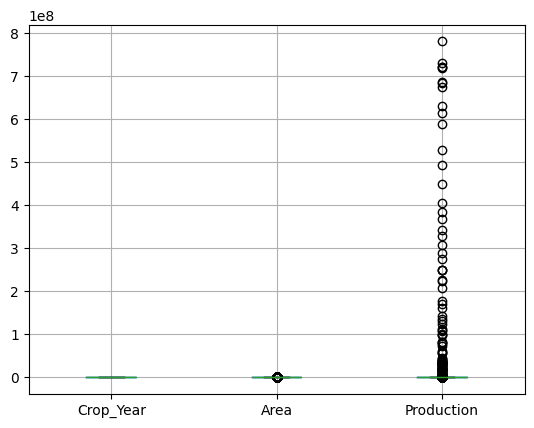

In [12]:
df.boxplot()
plt.show()

In [13]:
df.shape

(9561, 7)

In [14]:
df_clean=df.copy()

In [15]:
df_clean.shape

(9561, 7)

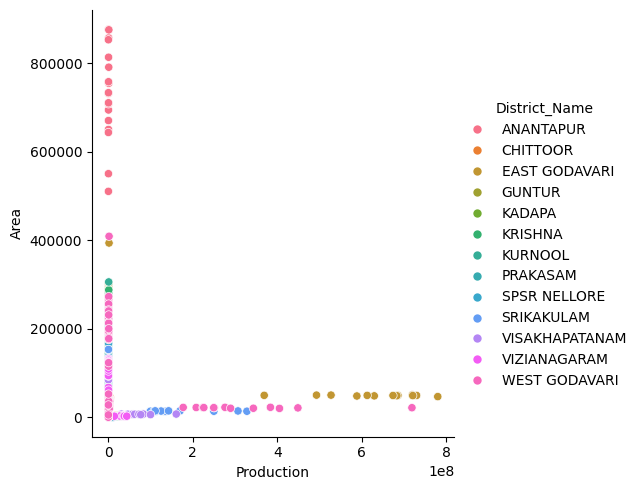

In [16]:
sns.relplot(x='Production',y='Area',data=df,hue='District_Name')
plt.show();

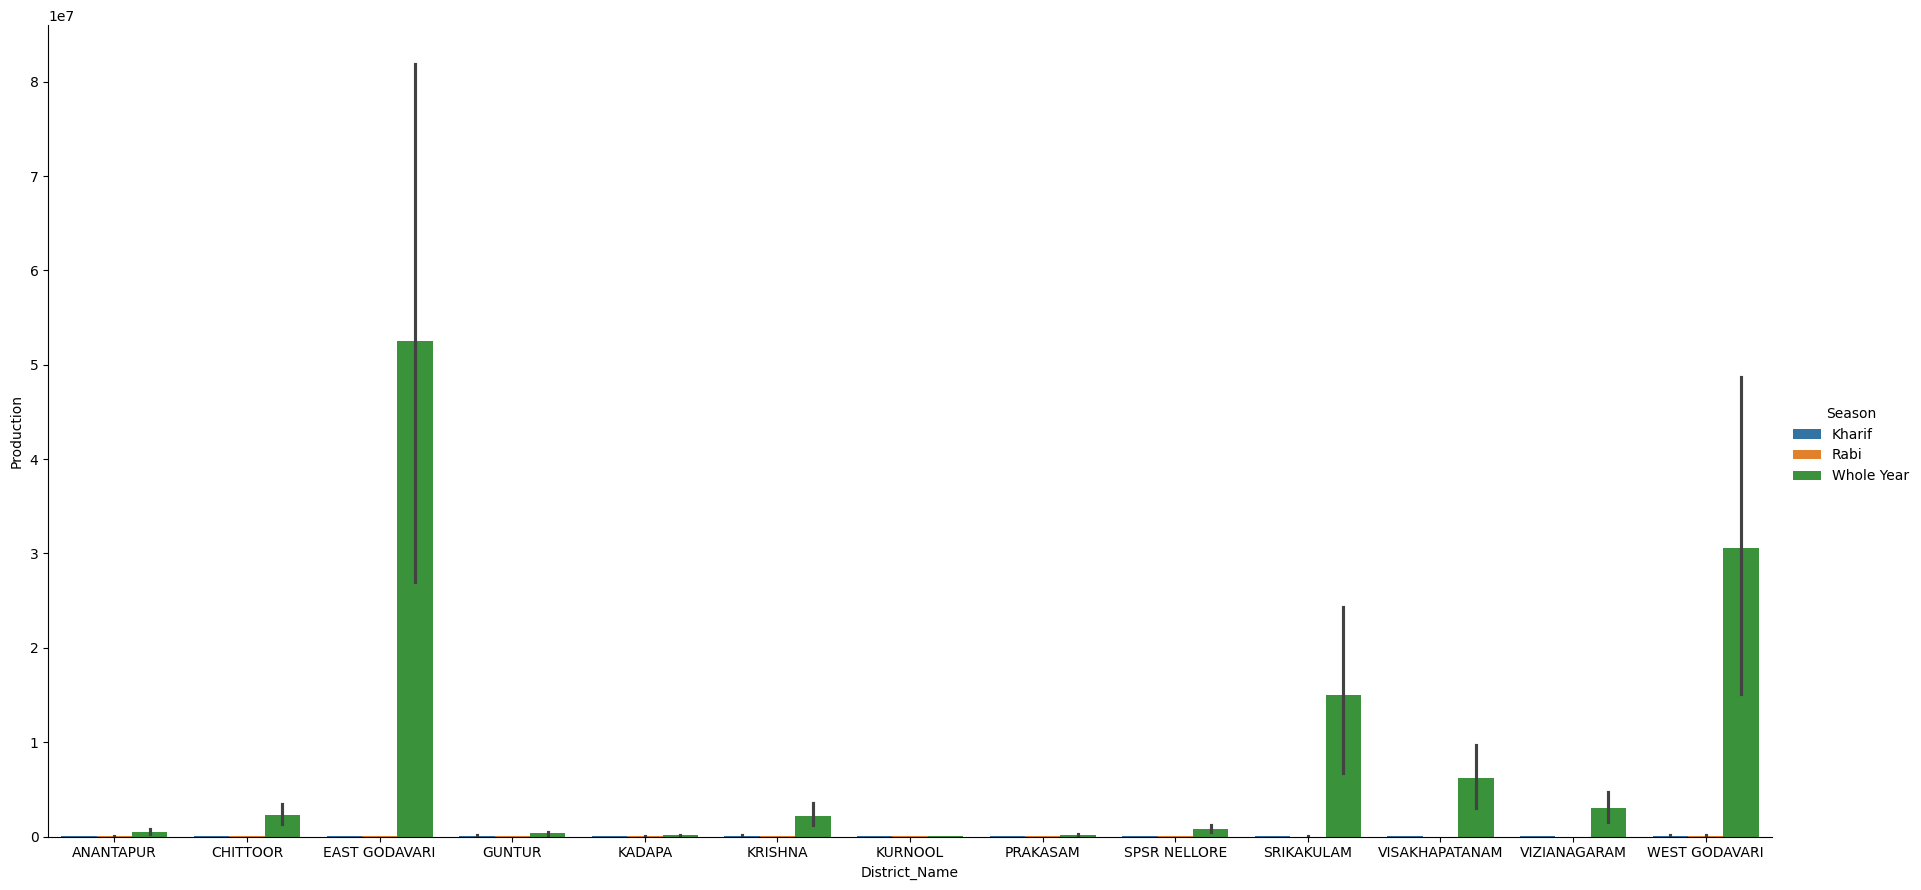

In [17]:
sns.catplot(x='District_Name',y='Production',data=df,kind='bar',height=9,aspect=2,hue='Season')

plt.show();

In [18]:
print("Skewness of Area:", df_clean['Area'].skew())
print("Skewness of Production:", df_clean['Production'].skew())


Skewness of Area: 8.975298594332443
Skewness of Production: 20.95303412369888


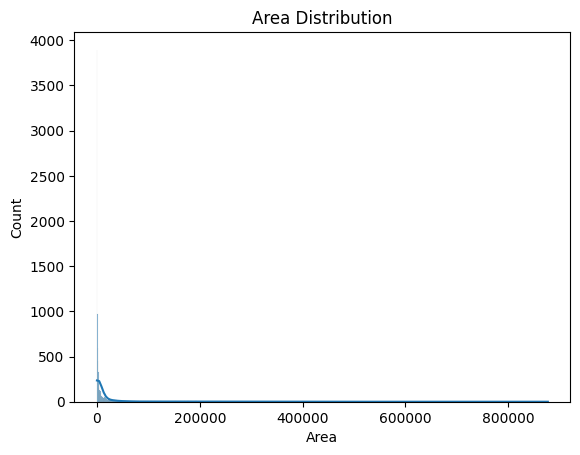

In [19]:
sns.histplot(df_clean['Area'], kde=True)
plt.title("Area Distribution")
plt.show();

In [20]:
def boxc(col):
    data=df_clean[col]
    min_value=data.min()
    if min_value <= 0:
        data=data+abs(min_value)+1
    transformed_data,lambda_used=boxcox(data)
    return transformed_data,lambda_used

In [21]:
a,a1=boxc('Area')
df_clean['Area_boxcox']=a

global_area_lambda =a1
global_shift = abs(df_clean['Area'].min()) + 1 if df_clean['Area'].min() <= 0 else 0
df_clean['Area_boxcox'].skew()

-0.01098385801460378

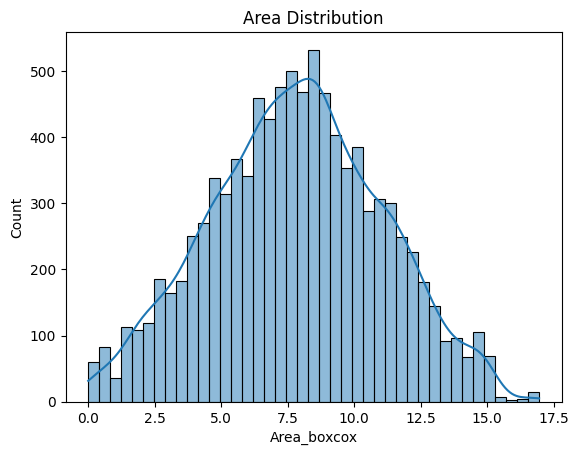

In [22]:
sns.histplot(df_clean['Area_boxcox'], kde=True)
plt.title("Area Distribution")
plt.show()

In [23]:
b,b1=boxc('Production')
df_clean['Production_boxcox']=b
df_clean['Production_boxcox'].skew()

-0.005741977922175864

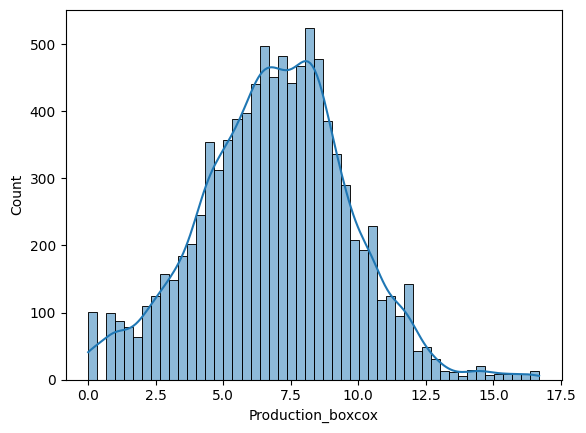

In [24]:
sns.histplot(df_clean['Production_boxcox'],kde=True)
plt.show()

In [25]:
print(df_clean['Production_boxcox'].kurt())
print(df_clean['Area_boxcox'].kurt())

0.2231706353716021
-0.4080633869498156


In [26]:
df_clean['Yield']=df_clean['Production']/df_clean['Area']

In [27]:
yield_data = df_clean['Yield']
min_yield_value = yield_data.min()
if min_yield_value <= 0:
    yield_data = yield_data + abs(min_yield_value) + 1

# Apply Box-Cox and store the lambda value
transformed_yield, yield_lambda = boxcox(yield_data)
df_clean['Yield_boxcox'] = transformed_yield

print("Skewness of Yield (original):", df_clean['Yield'].skew())
print("Skewness of Yield (boxcox):", df_clean['Yield_boxcox'].skew())

Skewness of Yield (original): 9.520783347336234
Skewness of Yield (boxcox): 0.3794207581512645


In [28]:
df_clean

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Area_boxcox,Production_boxcox,Yield,Yield_boxcox
0,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,11.636088,7.258085,0.121495,0.110882
1,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,8.098192,5.833933,0.357143,0.279527
2,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,7.681512,4.401920,0.100000,0.092688
3,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,10.205808,8.335951,1.287671,0.655201
4,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,9.325786,8.103020,1.918919,0.794737
...,...,...,...,...,...,...,...,...,...,...,...
9623,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,12.003127,10.155048,3.177173,0.966844
9624,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,5.879209,7.389330,13.549107,1.348199
9625,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,9.817474,7.781564,0.892027,0.531723
9626,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,11.656714,16.641909,33089.005477,1.696493


In [29]:
df_encoded=pd.get_dummies(df_clean,columns=['Season','Crop','District_Name'],drop_first=True)
df_encoded

,State_Name,Crop_Year,Area,Production,Area_boxcox,Production_boxcox,Yield,Yield_boxcox,Season_Rabi,Season_Whole Year,...,District_Name_GUNTUR,District_Name_KADAPA,District_Name_KRISHNA,District_Name_KURNOOL,District_Name_PRAKASAM,District_Name_SPSR NELLORE,District_Name_SRIKAKULAM,District_Name_VISAKHAPATANAM,District_Name_VIZIANAGARAM,District_Name_WEST GODAVARI
0,Andhra Pradesh,1997,21400.0,2600.0,11.636088,7.258085,0.121495,0.110882,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Andhra Pradesh,1997,1400.0,500.0,8.098192,5.833933,0.357143,0.279527,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Andhra Pradesh,1997,1000.0,100.0,7.681512,4.401920,0.100000,0.092688,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Andhra Pradesh,1997,7300.0,9400.0,10.205808,8.335951,1.287671,0.655201,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Andhra Pradesh,1997,3700.0,7100.0,9.325786,8.103020,1.918919,0.794737,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,Andhra Pradesh,2014,28046.0,89107.0,12.003127,10.155048,3.177173,0.966844,True,False,...,False,False,False,False,False,False,False,False,False,True
9624,Andhra Pradesh,2014,224.0,3035.0,5.879209,7.389330,13.549107,1.348199,True,False,...,False,False,False,False,False,False,False,False,False,True
9625,Andhra Pradesh,2014,5418.0,4833.0,9.817474,7.781564,0.892027,0.531723,True,False,...,False,False,False,False,False,False,False,False,False,True
9626,Andhra Pradesh,2014,21729.0,718991000.0,11.656714,16.641909,33089.005477,1.696493,False,True,...,False,False,False,False,False,False,False,False,False,True


In [30]:
bool_cols=df_encoded.select_dtypes('bool')

In [31]:
bool_cols=df_encoded.select_dtypes('bool').columns.tolist()
df_encoded[bool_cols]=df_encoded[bool_cols].astype('int')

In [32]:
print(df_clean['State_Name'].unique())


['Andhra Pradesh']


In [33]:
df_encoded.drop(columns=['State_Name'], inplace=True)

In [34]:
df_encoded.head()

,Crop_Year,Area,Production,Area_boxcox,Production_boxcox,Yield,Yield_boxcox,Season_Rabi,Season_Whole Year,Crop_Arhar/Tur,...,District_Name_GUNTUR,District_Name_KADAPA,District_Name_KRISHNA,District_Name_KURNOOL,District_Name_PRAKASAM,District_Name_SPSR NELLORE,District_Name_SRIKAKULAM,District_Name_VISAKHAPATANAM,District_Name_VIZIANAGARAM,District_Name_WEST GODAVARI
0,1997,21400.0,2600.0,11.636088,7.258085,0.121495,0.110882,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1997,1400.0,500.0,8.098192,5.833933,0.357143,0.279527,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,1000.0,100.0,7.681512,4.401920,0.100000,0.092688,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,7300.0,9400.0,10.205808,8.335951,1.287671,0.655201,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,3700.0,7100.0,9.325786,8.103020,1.918919,0.794737,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = df_encoded.drop(columns=['Crop_Year', 'Production', 'Area', 'Production_boxcox', 'Yield','Yield_boxcox'])
X['Area_boxcox'] = df_clean['Area_boxcox']

# Use the transformed Yield as the target column
y = df_clean['Yield_boxcox']

In [36]:
X.head()

,Area_boxcox,Season_Rabi,Season_Whole Year,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Bottle Gourd,Crop_Brinjal,...,District_Name_GUNTUR,District_Name_KADAPA,District_Name_KRISHNA,District_Name_KURNOOL,District_Name_PRAKASAM,District_Name_SPSR NELLORE,District_Name_SRIKAKULAM,District_Name_VISAKHAPATANAM,District_Name_VIZIANAGARAM,District_Name_WEST GODAVARI
0,11.636088,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.098192,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.681512,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.205808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.325786,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y.head()

0    0.110882
1    0.279527
2    0.092688
3    0.655201
4    0.794737
Name: Yield_boxcox, dtype: float64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
x_train

,Area_boxcox,Season_Rabi,Season_Whole Year,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Bottle Gourd,Crop_Brinjal,...,District_Name_GUNTUR,District_Name_KADAPA,District_Name_KRISHNA,District_Name_KURNOOL,District_Name_PRAKASAM,District_Name_SPSR NELLORE,District_Name_SRIKAKULAM,District_Name_VISAKHAPATANAM,District_Name_VIZIANAGARAM,District_Name_WEST GODAVARI
658,2.271801,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1207,5.091838,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6947,11.264307,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3677,7.384346,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8989,10.173889,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,8.544540,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5228,6.163869,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5428,8.190791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
864,2.958017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print(X.shape,y.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9561, 82) (9561,)
(7170, 82) (7170,)
(2391, 82) (2391,)


In [41]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [42]:
LRM=LinearRegression()
RM=Ridge()
LS=Lasso()
DT=DecisionTreeRegressor()
RF=RandomForestRegressor()
GBM=GradientBoostingRegressor()

LRM.fit(x_train_scaled,y_train)
RM.fit(x_train_scaled,y_train)
LS.fit(x_train_scaled,y_train)
DT.fit(x_train_scaled,y_train)
RF.fit(x_train_scaled,y_train)
GBM.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [43]:
models={
    'Linear Regression':LRM,
    'Ridge':RM,
    'LASSO':LS,
    'DECISION TREE':DT,
    'RANDOM FOREST':RF,
    'GRADIENT BOOST':GBM
}
results=pd.DataFrame()


In [44]:
# for name, model in models.items():
#   # Predict on the transformed scale
#   y_pred_transformed = model.predict(x_test_scaled)

#   # Inverse transform the predictions back to the original scale
#   if yield_lambda != 0:
#       y_pred = np.power(y_pred_transformed * yield_lambda + 1, 1 / yield_lambda)
#       y_test_original = np.power(y_test * yield_lambda + 1, 1 / yield_lambda)
#   else:
#       y_pred = np.exp(y_pred_transformed)
#       y_test_original = np.exp(y_test)

#   # Ensure original scale values are non-negative
#   y_pred = np.maximum(0, y_pred)
#   y_test_original = np.maximum(0, y_test_original)

#   # Now, calculate metrics on the original scale
#   MSE = mean_squared_error(y_test_original, y_pred)
#   RMSE = np.sqrt(MSE)
#   R2 = r2_score(y_test_original, y_pred)
#   MAE = mean_absolute_error(y_test_original, y_pred)
#   n = x_test_scaled.shape[0]  # number of data points
#   k = x_test_scaled.shape[1]  # number of features
#   Ar2 = 1 - (1 - R2) * (n - 1) / (n - k - 1)
  
#   results[name] = {'MSE': MSE, 'RMSE': RMSE, 'R2': R2, 'MAE': MAE, 'Ar2': Ar2}

In [45]:
for name, model in models.items():
  # Predict on the transformed scale
  y_pred_transformed = model.predict(x_test_scaled)
  print("Min transformed prediction:", y_pred_transformed.min())
  print("Max transformed prediction:", y_pred_transformed.max())


  # Inverse transform the predictions back to the original scale
  if yield_lambda != 0:
      # Use np.maximum to ensure the argument to np.power is always positive
      safe_arg = np.maximum(y_pred_transformed * yield_lambda + 1, 1e-6)
      y_pred = np.power(safe_arg, 1 / yield_lambda)
      
      # The line for y_test_original is generally fine, but we'll include a check for robustness
      safe_y_test_arg = np.maximum(y_test * yield_lambda + 1, 1e-6)
      y_test_original = np.power(safe_y_test_arg, 1 / yield_lambda)
  else:
      y_pred = np.exp(y_pred_transformed)
      y_test_original = np.exp(y_test)

  # Ensure original scale values are non-negative
  y_pred = np.maximum(0, y_pred)
  y_test_original = np.maximum(0, y_test_original)

  # Now, calculate metrics on the original scale
  MSE = mean_squared_error(y_test_original, y_pred)
  RMSE = np.sqrt(MSE)
  R2 = r2_score(y_test_original, y_pred)
  MAE = mean_absolute_error(y_test_original, y_pred)
  n = x_test_scaled.shape[0]  # number of data points
  k = x_test_scaled.shape[1]  # number of features
  Ar2 = 1 - (1 - R2) * (n - 1) / (n - k - 1)
  
  results[name] = {'MSE': MSE, 'RMSE': RMSE, 'R2': R2, 'MAE': MAE, 'Ar2': Ar2}

Min transformed prediction: -0.04587608129789522
Max transformed prediction: 1.7527173350314995
Min transformed prediction: -0.04580190281741081
Max transformed prediction: 1.7525229478636448
Min transformed prediction: 0.7448841296609575
Max transformed prediction: 0.7448841296609575
Min transformed prediction: 0.0
Max transformed prediction: 1.695438428221566
Min transformed prediction: 0.0
Max transformed prediction: 1.6949632644738353
Min transformed prediction: 0.27928782320022416
Max transformed prediction: 1.5405932662368471


In [46]:
results


,Linear Regression,Ridge,LASSO,DECISION TREE,RANDOM FOREST,GRADIENT BOOST
MSE,1.585754e+18,1.585754e+18,2.952152e+06,601165.100988,497019.631423,2.929439e+06
RMSE,1.259267e+09,1.259267e+09,1.718183e+03,775.348374,704.996192,1.711561e+03
R2,-5.459753e+11,-5.459753e+11,-1.642587e-02,0.793019,0.828876,-8.606033e-03
MAE,9.974114e+07,9.974114e+07,2.195027e+02,73.052169,60.007769,2.168059e+02
Ar2,-5.653730e+11,-5.653730e+11,-5.253805e-02,0.785665,0.822796,-4.444039e-02


In [47]:
selected_model_name=max(results,key=lambda name:results[name]['R2'])
selected_model=models[selected_model_name]
print(f"The best performing model is: {selected_model_name}")
selected_model

The best performing model is: RANDOM FOREST


RandomForestRegressor()

In [48]:
def predict_yield(crop, district, season, area):
    global global_area_lambda, global_shift, yield_lambda
    
    input_dict = dict.fromkeys(X.columns, 0)

    # Apply Box-Cox to the 'Area' input
    area_input = area + global_shift
    area_boxcox = (area_input ** global_area_lambda - 1) / global_area_lambda if global_area_lambda != 0 else np.log(area_input)
    input_dict['Area_boxcox'] = area_boxcox

    # One-hot for Crop and District
    crop_col = f'Crop_{crop}'
    district_col = f'District_Name_{district}'
    if crop_col in X.columns:
        input_dict[crop_col] = 1
    if district_col in X.columns:
        input_dict[district_col] = 1

    # Handle Season carefully because of drop_first=True
    season_cols = [col for col in X.columns if col.startswith('Season_')]
    if season == 'Kharif':
        for sc in season_cols:
            input_dict[sc] = 0
    else:
        season_col = f'Season_{season}'
        if season_col in X.columns:
            input_dict[season_col] = 1

    input_df = pd.DataFrame([input_dict])
    
    # === CRITICAL FIX: Reorder columns to match the training data ===
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    # Scale the input using the training scaler
    input_scaled = scalar.transform(input_df)

    # Predict using the selected model
    yield_pred_transformed = selected_model.predict(input_scaled)[0]

    # Inverse transform the predicted yield to the original scale
    if yield_lambda != 0:
        safe_arg = np.maximum(yield_pred_transformed * yield_lambda + 1, 1e-6)
        yield_pred = np.power(safe_arg, 1 / yield_lambda)
    else:
        yield_pred = np.exp(yield_pred_transformed)
        
    yield_pred = max(0, yield_pred)
    
    return yield_pred

In [49]:
predicted = predict_yield(
    crop='Maize',
    district='GUNTUR',
    season='Kharif',
    area=4500
)

print(f"✅ Predicted Yield: {predicted:.4f} tons/hectare (or whatever units you use)")


✅ Predicted Yield: 3.1338 tons/hectare (or whatever units you use)


In [50]:
print(df_clean['Season'].unique())


['Kharif' 'Rabi' 'Whole Year']


In [51]:
y_pred2=selected_model.predict(x_test_scaled)

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test_original, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


R² Score: -0.0086
Mean Absolute Error: 3.9737
Root Mean Squared Error: 8.9344


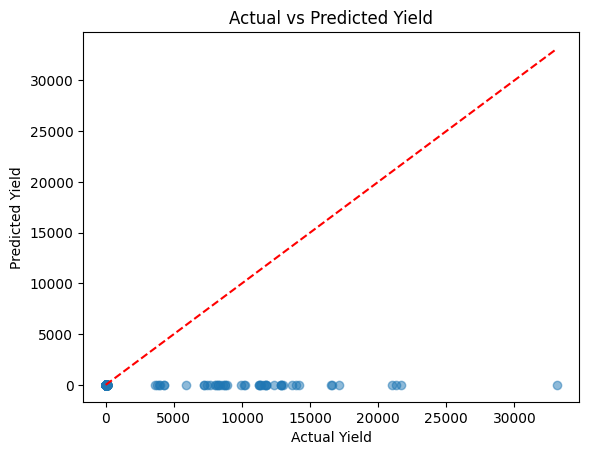

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_test_original, y_pred2, alpha=0.5)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.show()

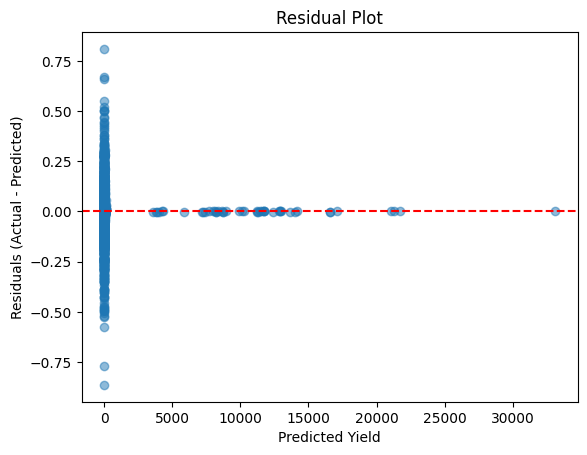

In [54]:
residuals = y_test - y_pred2
plt.scatter(y_test_original, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [56]:
# Step 1: Make sure your `predict_yield` function is correctly defined
# with the inverse transformation logic we discussed.

# Step 2: Select a few random rows from your test set
# You can change the 'n' value to check more or fewer rows
sample_indices = x_test.sample(n=5, random_state=42).index

print("Verifying predictions on sample test data:")
print("-" * 50)

# Step 3: Loop through the selected rows and make a prediction for each
for index in sample_indices:
    # Get the original values for the selected row from the df_clean dataframe
    original_row = df_clean.loc[index]

    crop = original_row['Crop']
    district = original_row['District_Name']
    season = original_row['Season']
    area = original_row['Area']
    actual_yield = original_row['Yield']
    
    # Predict the yield using your function
    predicted_yield = predict_yield(crop, district, season, area)
    
    print(f"Sample Index: {index}")
    print(f"  Inputs: Crop='{crop}', District='{district}', Season='{season}', Area={area}")
    print(f"  Actual Yield: {actual_yield:.2f}")
    print(f"  Predicted Yield: {predicted_yield:.2f}")
    print("-" * 50)

Verifying predictions on sample test data:
--------------------------------------------------
Sample Index: 6437
  Inputs: Crop='Onion', District='SPSR NELLORE', Season='Kharif', Area=86.0
  Actual Yield: 18.74
  Predicted Yield: 16.58
--------------------------------------------------
Sample Index: 2925
  Inputs: Crop='Arhar/Tur', District='GUNTUR', Season='Kharif', Area=13579.0
  Actual Yield: 1.26
  Predicted Yield: 2.18
--------------------------------------------------
Sample Index: 8368
  Inputs: Crop='Groundnut', District='VIZIANAGARAM', Season='Kharif', Area=67553.0
  Actual Yield: 1.02
  Predicted Yield: 1.85
--------------------------------------------------
Sample Index: 9279
  Inputs: Crop='Dry chillies', District='WEST GODAVARI', Season='Kharif', Area=14.0
  Actual Yield: 4.14
  Predicted Yield: 3.45
--------------------------------------------------
Sample Index: 5273
  Inputs: Crop='Rice', District='KURNOOL', Season='Kharif', Area=91569.0
  Actual Yield: 3.95
  Predicted

In [57]:

import pickle
pickle.dump(selected_model, open("yield_model.pkl", "wb"))
pickle.dump(scalar, open("scaler.pkl", "wb"))
pickle.dump(X.columns.tolist(), open("X_columns.pkl", "wb"))
pickle.dump(global_area_lambda, open("global_area_lambda.pkl", "wb"))
pickle.dump(global_shift, open("global_shift.pkl", "wb"))
pickle.dump(yield_lambda, open("yield_lambda.pkl", "wb"))
